In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Задание 1 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]


In [5]:
X = pd.DataFrame(data, columns=feature_names)

In [6]:
y = pd.DataFrame(target, columns=["price"])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

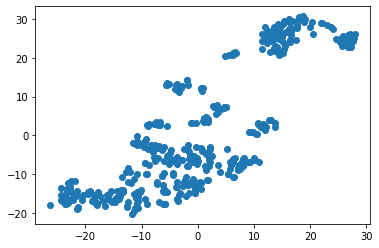

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2 

In [22]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=3)

In [27]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [28]:
pd.value_counts (labels_train)

1    190
0    128
2     86
dtype: int64

In [29]:
labels_test = kmeans.predict(X_test_scaled)

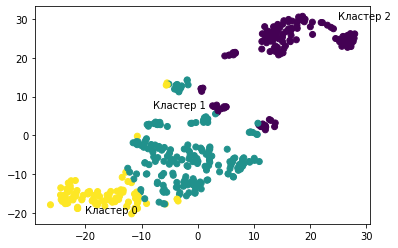

In [37]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text( -20, -20, 'Кластер 0')
plt.text(-8, 7, 'Кластер 1')
plt.text(25, 30, 'Кластер 2')
plt.show()

In [38]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

10.715219062500003

In [39]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

0.4221666842105262

In [40]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.07356558139534886

In [42]:
y_train[labels_train == 0].mean()

price    16.179688
dtype: float64

In [43]:
y_train[labels_train == 1].mean()

price    24.994737
dtype: float64

In [44]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64